<a href="https://colab.research.google.com/github/GiaLop/Python-Projects/blob/main/Fake_News_filter_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gensim

In [ ]:
# importing all required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import string
import spacy
import re
import gensim
import gensim.corpora as corpora
from nltk.corpus import stopwords
from nltk import ngrams
from gensim.utils import simple_preprocess
from gensim.models.coherencemodel import CoherenceModel
from pprint import pprint
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from PIL import Image
from wordcloud import WordCloud

In [ ]:
# importing data set
fake_ds = pd.read_csv('/content/drive/MyDrive/Profession AI/dataset e caricamenti/fake_news/Fake.csv')
true_ds = pd.read_csv('/content/drive/MyDrive/Profession AI/dataset e caricamenti/fake_news/True.csv')

# checking features
display(fake_ds.head())
true_ds.head()

# checking datas distribution
print("FAKE NEWS:\n")
display(fake_ds['subject'].value_counts().sum())
print("TRUE NEWS:\n")
true_ds['subject'].value_counts().sum()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


FAKE NEWS:



23481

TRUE NEWS:



21417

In [ ]:
# adding label Serie
fake_ds['label'] = 0
true_ds['label'] = 1

In [ ]:
# defining data cleaner function

nltk.download('stopwords')
nlp = spacy.load("en_core_web_sm")
stopwords = stopwords.words('english')

def data_cleaner(text):

  # lower, no punctuation
  tokens = simple_preprocess(text)

  # Lemmatizzation, removing stopwords
  document = nlp(" ".join(tokens))
  sentence = ' '.join(token.lemma_ for token in document)
  sentence = ' '.join(word for word in sentence.split() if word not in stopwords)
  sentence = re.sub('\d', '', sentence)

  return sentence.split()

# defining function for bag of words
def bow_count(dataset, vectorizer):

  if vectorizer == None:
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(dataset)
  else:
    X = vectorizer.transform(dataset)

  return X.toarray(), vectorizer

# defining function for ngrams
def ngr_function(sentence, n):
  ngr_sentence = ngrams(sentence, n)
  return [ngr for ngr in ngr_sentence]

<>:16: SyntaxWarning: invalid escape sequence '\d'
<>:16: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-3565154964.py:16: SyntaxWarning: invalid escape sequence '\d'
  sentence = re.sub('\d', '', sentence)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Checking recurrent pattern in fake and true titles

In [ ]:
# defining titles feature
fake_title = fake_ds['title']
true_title = true_ds['title']

In [ ]:
# applyiing data_cleaner function to fake titles
fake_title_cleaned = [data_cleaner(title) for title in fake_title]
fake_title_cleaned

[['donald',
  'trump',
  'send',
  'embarrassing',
  'new',
  'year',
  'eve',
  'message',
  'disturb'],
 ['drunk',
  'bragging',
  'trump',
  'staffer',
  'start',
  'russian',
  'collusion',
  'investigation'],
 ['sheriff',
  'david',
  'clarke',
  'become',
  'internet',
  'joke',
  'threaten',
  'poke',
  'people',
  'eye'],
 ['trump', 'obsessed', 'even', 'obama', 'name', 'code', 'website', 'image'],
 ['pope', 'francis', 'call', 'donald', 'trump', 'christmas', 'speech'],
 ['racist',
  'alabama',
  'cop',
  'brutalize',
  'black',
  'boy',
  'handcuff',
  'graphic',
  'image'],
 ['fresh',
  'golf',
  'course',
  'trump',
  'lash',
  'fbi',
  'deputy',
  'director',
  'james',
  'comey'],
 ['trump',
  'say',
  'insanely',
  'racist',
  'stuff',
  'inside',
  'oval',
  'office',
  'witness',
  'back'],
 ['former',
  'cia',
  'director',
  'slam',
  'trump',
  'un',
  'bullying',
  'openly',
  'suggest',
  'act',
  'like',
  'dictator',
  'tweet'],
 ['watch',
  'brand',
  'new',
  'pr

In [ ]:
# appling n_grams to obtain 3 grams
ngr_fake = [ngr_function(title, 3) for title in fake_title_cleaned]

# creating a flat list: obtaining first each titile's gram tuples , than each tuple for title
fake_flat_list = [gram for title in ngr_fake for gram in title]

# converting ngr in a pandas Serie
fake_ngrams =  pd.Series(fake_flat_list)
fake_ngrams.value_counts().head(15)

,count
"(black, life, matter)",165
"(boiler, room, ep)",138
"(supreme, court, justice)",53
"(new, york, times)",51
"(fox, news, host)",49
"(donald, trump, jr)",47
"(donald, trump, video)",45
"(anti, trump, protester)",42
"(trump, campaign, manager)",41
"(year, old, girl)",32


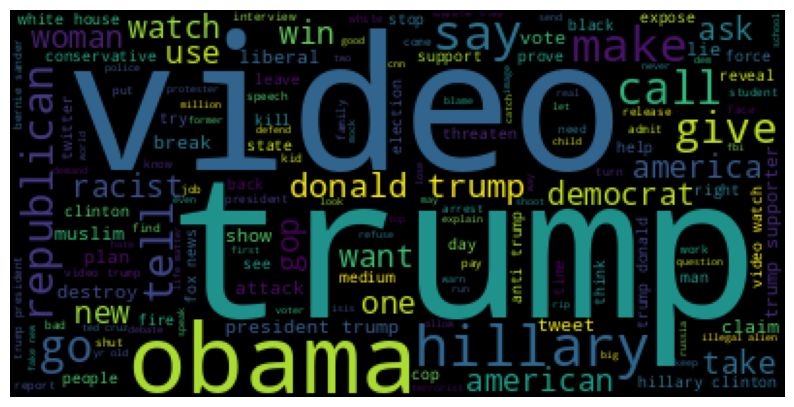

In [ ]:
# plotting word cloud

# estrapolating text for list of tuple
fake_text = " ".join([" ".join(trigram) for trigram in fake_flat_list])

# calling WordCloud to plot recurring words in Fake News
wc = WordCloud().generate(fake_text)
plt.rcParams['figure.figsize'] = (10,8)
plt.axis('off')
plt.imshow(wc)
plt.show()

In [ ]:
# applying data_cleaner function to true titles
true_title_cleaned = [data_cleaner(title) for title in true_title]
true_title_cleaned

[['budget', 'fight', 'loom', 'republicans', 'flip', 'fiscal', 'script'],
 ['military', 'accept', 'transgender', 'recruit', 'monday', 'pentagon'],
 ['senior', 'republican', 'senator', 'let', 'mr', 'mueller', 'job'],
 ['fbi', 'russia', 'probe', 'help', 'australian', 'diplomat', 'tip', 'nyt'],
 ['trump',
  'want',
  'postal',
  'service',
  'charge',
  'much',
  'amazon',
  'shipment'],
 ['white', 'house', 'congress', 'prepare', 'talk', 'spend', 'immigration'],
 ['trump', 'say', 'russia', 'probe', 'fair', 'timeline', 'unclear', 'nyt'],
 ['factbox', 'trump', 'twitter', 'dec', 'approval', 'rating', 'amazon'],
 ['trump', 'twitter', 'dec', 'global', 'warming'],
 ['alabama',
  'official',
  'certify',
  'senator',
  'elect',
  'jones',
  'today',
  'despite',
  'challenge',
  'cnn'],
 ['jones', 'certified', 'senate', 'winner', 'despite', 'moore', 'challenge'],
 ['new', 'york', 'governor', 'question', 'federal', 'tax', 'overhaul'],
 ['factbox',
  'trump',
  'twitter',
  'dec',
  'vanity',
  'fa

In [ ]:
# appling n_grams to obtain 3 grams
ngr_true = [ngr_function(title, 3) for title in true_title_cleaned]

# creating flat list
true_flat_list = [gram for title in ngr_true for gram in title]

# converting ngr in a pandas Serie
true_grams = pd.Series(true_flat_list)

# visualizing top 15 trigram
true_grams.value_counts().head(15)

,count
"(white, house, say)",87
"(house, speaker, ryan)",76
"(factbox, trump, twitter)",72
"(iran, nuclear, deal)",71
"(trump, travel, ban)",63
"(uk, pm, may)",48
"(reuter, ipsos, poll)",48
"(highlight, trump, presidency)",47
"(south, china, sea)",44
"(say, north, korea)",36


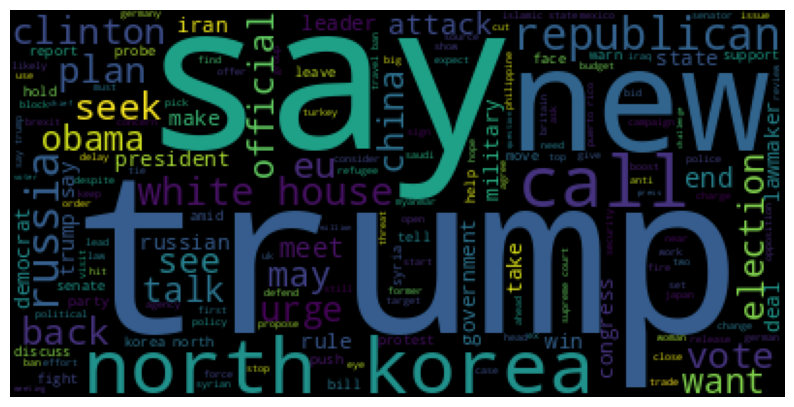

In [ ]:
# plotting word cloud

# estrapolating text to plot recurring words in True News
true_text = " ".join([" ".join(trigram) for trigram in true_flat_list])

# calling tord cloud
wc = WordCloud().generate(true_text)
plt.rcParams['figure.figsize'] = (10,8)
plt.axis('off')
plt.imshow(wc)
plt.show()

#Observation

**Fake titles** have focus on:
- civil right and juridic system,
- Trump communication and campaign,
- citing no istitutional sources, only Fox Channel (Republican-friendly channel)

<br>

**True titles** have focus on:
- foreign politics,
- the White House as institutional source
- Trump's political statements

# Checking for recurring topics in fake news

In [ ]:
# concat 2 datastes
ds = pd.concat([fake_ds, true_ds])

# new feature with sample texts
ds_sample = ds.sample(10000, random_state=42)

# estrapolating only texts datas
ds_texts = [text for text in ds_sample['text']]

# preprocessing data con data_cleaner function
ds_texts_cleaned = [data_cleaner(word) for word in ds_texts]

# defining parameters for LDA
ds_dict = corpora.Dictionary(ds_texts_cleaned)
ds_bow = [ds_dict.doc2bow(text) for text in ds_texts_cleaned]

# calling LDA model
LDA = gensim.models.LdaMulticore
lda_model = LDA(
    corpus=ds_bow,
    id2word=ds_dict,
    num_topics=10,
    passes=10,
    random_state=42
)

In [ ]:
# printing key words for each topic
pprint(lda_model.print_topics())
doc_lda = lda_model[ds_bow]

[(0,
  '0.009*"say" + 0.008*"vote" + 0.007*"state" + 0.006*"obama" + 0.006*"year" + '
  '0.006*"clinton" + 0.006*"school" + 0.005*"party" + 0.005*"student" + '
  '0.005*"people"'),
 (1,
  '0.022*"say" + 0.011*"would" + 0.011*"house" + 0.011*"trump" + '
  '0.007*"senate" + 0.007*"president" + 0.007*"republican" + 0.007*"bill" + '
  '0.006*"committee" + 0.006*"washington"'),
 (2,
  '0.031*"percent" + 0.010*"year" + 0.010*"poll" + 0.010*"say" + '
  '0.009*"market" + 0.008*"trade" + 0.007*"tax" + 0.007*"would" + 0.007*"rate" '
  '+ 0.007*"company"'),
 (3,
  '0.026*"say" + 0.009*"government" + 0.009*"president" + 0.008*"would" + '
  '0.008*"country" + 0.007*"party" + 0.007*"united" + 0.006*"minister" + '
  '0.006*"states" + 0.005*"iran"'),
 (4,
  '0.011*"people" + 0.010*"trump" + 0.010*"go" + 0.010*"say" + 0.008*"like" + '
  '0.008*"make" + 0.008*"one" + 0.007*"get" + 0.006*"right" + 0.006*"know"'),
 (5,
  '0.027*"say" + 0.019*"north" + 0.015*"korea" + 0.014*"china" + '
  '0.011*"nuclear" +

In [ ]:
# calcolating coherence score
cm = CoherenceModel(model=lda_model, texts=ds_texts_cleaned, dictionary=ds_dict, coherence='c_v')
coherence = cm.get_coherence()
print(f"Coherence Score: {coherence:.2f}")

Coherence Score: 0.44


In [ ]:
# finding topics

# initializing empty list
topic_assignments = []

# itearating through cleaned words in corpus
for bow in ds_bow:
    # finding topic with higher prob
    topic_probs = lda_model.get_document_topics(bow)
    # keeping topic[0] for max prob[1]
    dominant_topic = max(topic_probs, key=lambda x: x[1])[0]
    # saving topic in list
    topic_assignments.append(dominant_topic)

In [ ]:
# finding fake news % for each topic

# saving topics in ds_sample
ds_sample['topic'] = topic_assignments

# creating count df groupingby topic and label, setting labels as columns (.size().unstack())
count = ds_sample.groupby(['topic', 'label']).size().unstack().fillna(0)
count.columns = ['fake', 'true']
# having total docs for topic by summing both true and fake
count['total'] = count.sum(axis=1)
# calculating % fake
count['% fake'] = (count['fake'] / count['total']*100).round(2)
# assigning topic name to each topic
topic_name = {
    0 : 'Democratic politics',
    1 : 'Internal politics',
    2 : 'Economics',
    3 : 'Government',
    4 : 'Trump communications',
    5 : 'Korea/China, nuclear',
    6 : 'News',
    7 : 'Juridical system',
    8 : 'Conflicts',
    9 : "Trump's campaign"
}
count.index = count.index.map(topic_name)
count

,fake,true,total,% fake
topic,,,,
Democratic politics,896,226,1122,79.86
Internal politics,238,1028,1266,18.80
Economics,48,159,207,23.19
Government,105,1333,1438,7.30
Trump communications,1635,22,1657,98.67
"Korea/China, nuclear",55,487,542,10.15
News,303,7,310,97.74
Juridical system,452,272,724,62.43
Conflicts,316,870,1186,26.64


# Observation
Fake news are recurring in:
- Democratic politcs
- Trump's communication
- juridical system
- more than 50% on Trump's compaign. <br>

I ran the notebook several times and some topics slightly changed. Topic labels refer to my last run.


# Model training

In [ ]:
# defining data cleaner function, returning only sentence
from nltk.corpus import stopwords
nltk.download('stopwords')
nlp = spacy.load("en_core_web_sm")
stopwords = stopwords.words('english')

def data_cleaner(text):

  # lower, no punctuation
  tokens = simple_preprocess(text)

  # Lemmatizzation, removing stopwords
  document = nlp(" ".join(tokens))
  sentence = ' '.join(token.lemma_ for token in document)
  sentence = ' '.join(word for word in sentence.split() if word not in stopwords)
  sentence = re.sub('\d', '', sentence)

  return sentence

<>:16: SyntaxWarning: invalid escape sequence '\d'
<>:16: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-3984350491.py:16: SyntaxWarning: invalid escape sequence '\d'
  sentence = re.sub('\d', '', sentence)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# preprocessing data

# concat 2 datasets in 1, ds ready for the training
ds = pd.concat([fake_ds, true_ds])

print(ds[['title', 'text']].duplicated().sum())

5793


In [ ]:
# dropping duplicated
ds = ds.drop_duplicates(subset=['title', 'text'])

# joining title and text
ds_all_texts = ds['title'] + " " + ds['text']

# cleaning datas
X = [data_cleaner(text) for text in ds_all_texts]

# defining target
y = ds['label']

# splitting data i train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# vectorizing, fitting and transforming
vec = TfidfVectorizer()
X_train_vec = vec.fit_transform(X_train)
X_test_vec = vec.transform(X_test)

In [ ]:
# calling Logistic model
lr = LogisticRegression()

# fitting datas
lr.fit(X_train_vec, y_train)

# perdicting labels for training datas
y_train_pred = lr.predict(X_train_vec)


""" Non avevo utilizzato questo metodo perchè consultando i miei appunti, slides e github
    non l'ho mai incontrato """

# calculating metrics for tain datas with lr model
lr_train_report = classification_report(y_train, y_train_pred, target_names=['fake', 'true'])


# printing result
print("Logistic Train scores:\n")
print(lr_train_report)

Logistic Train scores:

              precision    recall  f1-score   support

        fake       0.99      0.99      0.99     14326
        true       0.99      0.99      0.99     16958

    accuracy                           0.99     31284
   macro avg       0.99      0.99      0.99     31284
weighted avg       0.99      0.99      0.99     31284



In [ ]:
# predicting labels on test datas
y_test_pred = lr.predict(X_test_vec)

# calculating metrics for tain datas with lr model
lr_test_report = classification_report(y_test, y_test_pred, target_names=['fake', 'true'])


# printing result
print("Logistic Test scores:\n")
print(lr_test_report)

Logistic Test scores:

              precision    recall  f1-score   support

        fake       0.99      0.98      0.98      3582
        true       0.98      0.99      0.99      4239

    accuracy                           0.99      7821
   macro avg       0.99      0.99      0.99      7821
weighted avg       0.99      0.99      0.99      7821



In [ ]:
# trying different model

# calling Naive Bayes model
nb = MultinomialNB()

# fitting data to the model
nb.fit(X_train_vec, y_train)

# predicting label on train datas
y_pred_train_nb = nb.predict(X_train_vec)

# calculating metrics for tain datas with nb model
nb_train_report = classification_report(y_train, y_pred_train_nb, target_names=['fake', 'true'])

# printing result
print("Naive Bayes Train scores:\n")
print(nb_train_report)

Naive Bayes Train scores:

              precision    recall  f1-score   support

        fake       0.96      0.92      0.94     14326
        true       0.93      0.97      0.95     16958

    accuracy                           0.94     31284
   macro avg       0.95      0.94      0.94     31284
weighted avg       0.95      0.94      0.94     31284



In [ ]:
# predict labels on test datas
y_test_pred_nb = nb.predict(X_test_vec)

# calculating metrics for tain datas with lr model
nb_test_report = classification_report(y_test, y_test_pred_nb, target_names=['fake', 'true'])

# printing result
print("Naive Bayes Test scores:\n")
print(nb_test_report)

Naive Bayes Test scores:

              precision    recall  f1-score   support

        fake       0.96      0.91      0.93      3582
        true       0.93      0.97      0.95      4239

    accuracy                           0.94      7821
   macro avg       0.94      0.94      0.94      7821
weighted avg       0.94      0.94      0.94      7821



# Observation

I cleaned datas with data cleaner function, than I used Tf-Idf vectorizer.

After splitting datas I trained a logistic model with 0.99 scores in all three (accuracy, recall, precision).

I trained another model, Multinomial Naive Bayes this time, and scores were a little lower.

# Exporting data in pickel format

In [ ]:
# importing library
import pickle

# open a file in write binary, saving in pkl format
with open ('fake_news_filter.pkl', 'wb') as f:
  # carico il modello nel file
  pickle.dump(lr, f)

# saving also the vectorizer(model trained vocabulary)
with open('tf_idf_vectorizer.pkl', 'wb') as f:
  pickle.dump(vec, f)